In [1]:
%cd drive/MyDrive/thesis
%ls

/content/drive/MyDrive/thesis
cc.zh.300.bin                            wen_yue_sent_alignment.csv
cmn_wen_sent_alignment.csv               wen_yue_subs.csv
cmn_wen_subs.csv                         wuu_wen_bigram.csv
cmn_wuu_sent_alignment.csv               wuu_wen_sent_alignment.csv
cmn_wuu_subs.csv                         wuu_wen_subs.csv
cmn_yue_sent_alignment.csv               wuu_wen_trigram.csv
cmn_yue_subs.csv                         wuu_wen_unigram.csv
cmn-yue-wuu-wen-parallel-simplified.csv  wuu_yue_sent_alignment.csv
sgns.merge.char                          wuu_yue_subs.csv
wen_wuu_sent_alignment.csv


In [2]:
import pandas as pd
import numpy as np
import random
from statistics import stdev, mean, median
import seaborn as sns

In [3]:
data = pd.read_csv("cmn-yue-wuu-wen-parallel-simplified.csv", encoding="utf-8")
data

,Unnamed: 0,Unnamed: 0.1,cmn_id,cmn_sentence,wuu_sentence,wen_sentence,yue_id,yue_sentence
0,0,0,1,我们试试看！,阿拉试试！,卬你试试眙！,736566,我哋试吓吖！
1,1,1,51,那又怎样?,哏末哪能呢？,那就訾那能爻？,613421,嗯，咁呢？
2,2,2,339240,不要说废话！,侬勿要瞎讲！,覅讲废话！,405462,唔好喺度乱噏廿四！
3,3,3,340093,这个苹果很酸。,搿只苹果老酸个。,居个苹果酸显酸。,493501,呢粒苹果好酸。
4,4,4,342196,别忘了明天六时来接我。,勿要忘记脱明朝6点钟来寻我。,覅悗记爻明朝六点钟走来接我。,487447,唔好唔记得听日六点嚟搵我喎。
...,...,...,...,...,...,...,...,...
135,135,135,5500559,你们比我还高。,侬比我高。,你厘比我还高哩。,477683,你高过我。
136,136,136,6559017,你好吗？,侬好伐？,你好啊伐？,480820,你点呀？
137,137,137,10329955,你们怎么就是没相信我呢？,侬为啥勿相信我？,你厘訾那就冇相信我呢？,481503,你点解唔信我呀？
138,138,138,10631557,他父母对他怀有过高的期望。,伊拉爷娘对伊期望过高。,渠个爸妈对渠期望忒高。,488277,佢阿爸阿妈对佢期望过高。


In [4]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=a60084833707b8ae62ee94e7bbe36f7e66558e6ecca7b08b4385bf327debaef3
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers


In [5]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer("DMetaSoul/sbert-chinese-general-v2-distill")

In [6]:
sen_1 = model.encode(["我们"], convert_to_tensor=True)
sen_2 = model.encode(["我你"], convert_to_tensor= True)
cosine_score = util.cos_sim(sen_1, sen_2)
cosine_score.item(), sen_1.shape, sen_2.shape

(0.8356842398643494, torch.Size([1, 768]), torch.Size([1, 768]))

In [15]:
## function to get average sentence cosine scores for a language pair
def get_allcosineScores(lang_1, lang_2): 
  punc = ["。", "，", "！", "？", "'", "\"", ",", ".", "、", "?", "「", "」"]
  num = "0123456789"
  all = {}
  for i, s_1 in enumerate(lang_1):
    s_1 = "".join([c.strip() for c in s_1 if c not in punc and c not in num])
    s_2 = "".join([c.strip() for c in lang_2[i] if c not in punc and c not in num])
    emb_1 = model.encode([s_1], convert_to_numpy=True)
    emb_2 = model.encode([s_2], convert_to_numpy=True)
    cos_score = util.cos_sim(emb_1, emb_2).item()
    all[(s_1, s_2)] = cos_score
  return all

In [16]:
get_allcosineScores(["我们试试看"],["阿拉试试"] )

{('我们试试看', '阿拉试试'): 0.8954527378082275}

In [9]:
wuu = data["wuu_sentence"]
wen = data["wen_sentence"]
yue = data["yue_sentence"]
cmn = data["cmn_sentence"]

In [17]:
## wuu and wen
get_allcosineScores(wuu, wen)

{('阿拉试试', '卬你试试眙'): 0.8617162704467773,
 ('哏末哪能呢', '那就訾那能爻'): 0.8422865867614746,
 ('侬勿要瞎讲', '覅讲废话'): 0.839146614074707,
 ('搿只苹果老酸个', '居个苹果酸显酸'): 0.9172435402870178,
 ('勿要忘记脱明朝点钟来寻我', '覅悗记爻明朝六点钟走来接我'): 0.8255165815353394,
 ('我相信伊是个聪明人', '我相信渠是个聪明人'): 0.9704947471618652,
 ('啥辰光出发最方便侬', '若能届走最方便啊你'): 0.8832966089248657,
 ('我永远勿会得忘记脱侬', '我永远覅悗记你'): 0.8900120854377747,
 ('我打算拿搿只手錶送拨侬', '我打算逮居个手表送匄你'): 0.8985890746116638,
 ('搿眼是啥人个书', '居厘书是何乜人个'): 0.9184279441833496,
 ('搿条规则勿是啥个辰光侪适用个', '居条规定否是若能届沃可以用个'): 0.847919762134552,
 ('天气每日天侪垃海变', '天气每日沃是得变'): 0.9360030889511108,
 ('侬应该跟㑚爷娘谈清爽先', '你应该伉你爸妈谈一谈先'): 0.9079103469848633,
 ('呒没多少人垃海', '参加个人并否多'): 0.9257959723472595,
 ('阿拉个结论就是诶额传言是真个', '我厘个结论就是许个传言是真个'): 0.8774457573890686,
 ('汤姆回到乡下头了', '汤姆走乡下转哦罢'): 0.9071623682975769,
 ('搿眼古老个习俗侪是一代一代传统传下来个', '居厘老个习俗沃是一代一代传下个'): 0.9184694886207581,
 ('伊穿啥侪好看', '渠著何乜沃好眙'): 0.8596330881118774,
 ('房子一家家着起火来', '屋宕一间一间能烧起'): 0.9071007370948792,
 ('伊昨日啥个道理勿来', '渠昨夜妆嚷冇走来'): 0.8752487301826477,
 ('伊个房间除脱张桌凳别样物事侪

In [22]:
def get_distribution(lang1, lang2):
  all_avg_scores = []
  scores = list(get_allcosineScores(lang1, lang2).values())
  for i in range(1000):  
    sent_scores = random.choices(scores, k=len(scores))
    avg_score = sum(sent_scores)/len(sent_scores)
    all_avg_scores.append(avg_score)
  return all_avg_scores

def plot(df, color=None, annotate_mean=True):
  # Calculating mean and standard deviation
  m, sd = 0, 0 
  ax = sns.kdeplot()
  t = 0
  for name in df.columns:
    md = median(df[name])
    mn = mean(df[name])
    sd = stdev(df[name])
    print("Language pair:", name[:3]+",", name[4:8])
    print("mean: ", mn, ";", "median: ", md, "standard derivation: ", sd)
    print("2u: ", md-2*sd, "-", md+2*sd)
    #ax = sns.histplot(df, stat="probability", kde=True, color=color) 
    if annotate_mean:
      ax.axvline(x=md, color="pink")
      t += 1
      ax.annotate(s="median: "+str(md)[:5], xy=(md+0.001,t))
    ax = sns.kdeplot(data=df, color=color, common_norm=True) #bw_adjust=.5) 
    ax.plot()

In [19]:
## cmn and wen
cmn_wen = get_distribution(cmn, wen)
cmn_wuu = get_distribution(cmn, wuu)
cmn_yue = get_distribution(cmn, yue)
wuu_wen = get_distribution(wuu, wen)
wuu_yue = get_distribution(wuu, yue)
wen_yue = get_distribution(wen, yue)

In [24]:
stack = np.stack((np.array(cmn_wen),np.array(cmn_wuu), np.array(cmn_yue),
                  np.array(wuu_wen), np.array(wuu_yue), np.array(wen_yue)), axis=1)
all_df = pd.DataFrame(stack, columns=["cmn_wen", "cmn_wuu", "cmn_yue", "wuu_wen", "wuu_yue", "wen_yue"])

Language pair: cmn, wen
mean:  0.9251329182497092 ; median:  0.9251412172402654 standard derivation:  0.0035309745842370763
2u:  0.9180792680717913 - 0.9322031664087396
Language pair: cmn, wuu
mean:  0.9256348823411125 ; median:  0.9255788839289121 standard derivation:  0.0034645430025458746
2u:  0.9186497979238203 - 0.9325079699340039
Language pair: cmn, yue
mean:  0.9218011085007872 ; median:  0.9217959063393729 standard derivation:  0.0038695686689168476
2u:  0.9140567690015392 - 0.9295350436772066
Language pair: wuu, wen
mean:  0.9145217024212261 ; median:  0.9145159772831759 standard derivation:  0.0034399052906528165
2u:  0.9076361667018703 - 0.9213957878644815
Language pair: wuu, yue
mean:  0.9086865615740309 ; median:  0.9087448890191796 standard derivation:  0.003134948222549414
2u:  0.9024749925740808 - 0.9150147854642784
Language pair: wen, yue
mean:  0.9175527591536874 ; median:  0.9175554682379183 standard derivation:  0.0032261900869888344
2u:  0.9111030880639407 - 0.9240

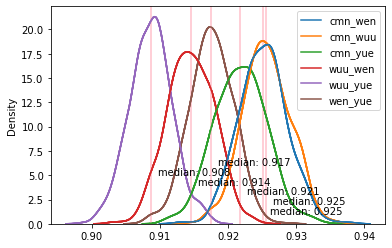

In [25]:
plot(all_df)